In [1]:
# gauss elimination
import numpy as np

def GE(A, b):
    n1 = '\n'
    if len(b) != len(A):
        print("please check inputs , vector length not equal matrix row count !")
    if len(A) != len(A[0]):
        print("Matrix A is non invertible !")
    b = b.reshape(-1,1)
    matrix = np.concatenate([A, b], axis=1)
    matrix = np.array(matrix, dtype=np.float32)
    length = len(matrix)
    pivot_vector = [None]*length
    p_vector = np.arange(0,length)
    print(f"initial matrix is: {n1}{matrix}")
    for i in range(length):
        max_index = np.where(np.abs(matrix[:,i][i:]) == np.amax(np.abs(matrix[:,i][i:])))
        matrix[([max_index[0][0]+i, i])] = matrix[([i, max_index[0][0]+i])]
        p_vector[max_index[0][0]+i], p_vector[i] = p_vector[i], p_vector[max_index[0][0]+i]
        pivot = matrix[i][i]
        pivot_vector[i] = pivot
        for j in range(i+1, length):
            factor = matrix[j][i]/float(pivot)
            for k in range(i, len(matrix[0])):
                matrix[j][k] -= matrix[i][k]*factor
        
    x = [None]*length
#     if any(matrix[-1][0:length]) == 0:
#         print("No unique solution.")
#         x[-1] = 1
#     elif any(matrix[-1][0:length-1]) == 0 and matrix[-1][-1] != 0:
#              print("bye")
#     else:
#         x[-1] = matrix[-1][length]/matrix[-1][length-1]
    
    x[-1] = matrix[-1][length]/matrix[-1][length-1]    
    for i in range(length-2, -1, -1):
        temp = matrix[i][-1]
        for j in range(length-1, i, -1):
            temp -= x[j]*matrix[i][j]
        x[i] = temp/matrix[i][i]
    print(f"matrix after gauss-elimination: {n1}{matrix}")
    print(f"pivot vector: {n1} {pivot_vector}")
    print(f"permutation vector: {n1} {p_vector}")
    print(f"answer is: {n1} {x}")
            
matrix = np.array([[1,2,1],
                   [2,1,1],
                   [-1,-1,2]])
b = np.array([15,12,7])
GE(matrix,b)

initial matrix is: 
[[ 1.  2.  1. 15.]
 [ 2.  1.  1. 12.]
 [-1. -1.  2.  7.]]
matrix after gauss-elimination: 
[[ 2.         1.         1.        12.       ]
 [ 0.         1.5        0.5        9.       ]
 [ 0.         0.         2.6666667 16.       ]]
pivot vector: 
 [2.0, 1.5, 2.6666667]
permutation vector: 
 [1 0 2]
answer is: 
 [1.0, 4.0, 6.0]


In [26]:
import numpy as np

def check(A):
    values, vectors = np.linalg.eig(A)
    vectors_inv = np.linalg.inv(vectors)
    print(values)
    print(vectors)
    print(vectors_inv)
    # checking for invertibility with zero tolerance of 1e-6
    det = 1
    for i in values:
        det *= i
    if np.abs(det)<1e-6:
        print("Non-Invertible")
    else:
        print("Invertible")
        
    #checking for diagonalizability with zero tolerance of 1e-6
    if np.abs(np.linalg.det(vectors))<1e-6:
        print("Non-Diagonalizable")
    else:
        print("Diagonalizable")
#     for i,value1 in enumerate(values):
#         for j,value2 in enumerate(values):
#             if i!=j:
#                 if np.abs(value1-value2)<1e-6:
#                     print("Non-Diagonalizable")
#                     return
#     print("Diagonalizable")
        
# matrix = np.array([[1,2,3],
#                    [4,5,6],
#                    [7,8,9]], dtype=np.float32)
matrix = np.array([[1,3,-3],
                  [0,4,5],
                  [0,0,9]], dtype=np.float32)
check(matrix)

[1. 4. 9.]
[[1.         0.70710677 0.        ]
 [0.         0.70710677 0.70710677]
 [0.         0.         0.70710677]]
[[ 1.        -1.         1.       ]
 [ 0.         1.4142135 -1.4142135]
 [ 0.         0.         1.4142135]]
Invertible
Diagonalizable


In [18]:
import numpy as np

def diagonalizable(A):
    values, vectors = np.linalg.eig(A)
    #print(values, vectors)
    #checking for diagonalizability with zero tolerance of 1e-6
    if np.abs(np.linalg.det(vectors))<1e-6:
        print("Non-Diagonalizable")
    else:
        print("Diagonalizable")
        lam = np.diag(values)
        print("Lambda matrix is :\n{}".format(lam))
        print("S matrix is: \n{}".format(vectors))
        LHS = np.matmul(A, vectors)
        RHS = np.matmul(vectors, lam)

        # comparing elementwise (A*S) with (S*Lambda) with a tolerance of 1e-6.
        for i in range(len(LHS)):
            for j in range(len(LHS[0])):
                if np.abs(LHS[i][j]-RHS[i][j])>1e-6:
                    print("Verification Failed Successfully with tolerance of 0.001!")
        print("Verification Passed Successfully with tolerance of 1e-6!")
#     for i,value1 in enumerate(values):
#         for j,value2 in enumerate(values):
#             if i!=j:
#                 if np.abs(value1-value2)<1e-6:
#                     print("Non-Diagonalizable")
#                     return
#     print("Diagonalizable")
#     lam = np.diag(values)
#     print("Lambda matrix is :\n{}".format(lam))
#     print("S matrix is: \n{}".format(vectors))
#     LHS = np.matmul(A, vectors)
#     RHS = np.matmul(vectors, lam)
    
#     # comparing elementwise (A*S) with (S*Lambda) with a tolerance of 1e-6.
#     for i in range(len(LHS)):
#         for j in range(len(LHS[0])):
#             if np.abs(LHS[i][j]-RHS[i][j])>1e-6:
#                 print("Verification Failed Successfully with tolerance of 1e-6!")
#     print("Verification Passed Successfully with tolerance of 1e-6!")

matrix = np.array([[1,1,4],
                   [1,0,4],
                   [4,4,8]], dtype=np.float32)
# matrix = np.array([[0.6,0.9],
#                   [0.4,0.1]], dtype=np.float32)
diagonalizable(matrix)

Diagonalizable
Lambda matrix is :
[[ 1.2000000e+01  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  4.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00 -1.3470808e-16]]
S matrix is: 
[[-4.0824831e-01 -7.0710677e-01 -5.7735026e-01]
 [-4.0824831e-01  7.0710677e-01 -5.7735026e-01]
 [-8.1649661e-01 -2.6121496e-16  5.7735026e-01]]
Verification Passed Successfully with tolerance of 1e-6!


In [29]:
import numpy as np

def power(A, n):
    values, vectors = np.linalg.eig(A)
    #checking for diagonalizability with zero tolerance of 1e-6
    if np.abs(np.linalg.det(vectors))<1e-6:
        print("Non-Diagonalizable")
    else:
        print("Diagonalizable")
        lam = np.diag(values**n)
        vectors_inv = np.linalg.inv(vectors)
        ans = vectors@lam@vectors_inv
        return ans

[[ 1  3 -3]
 [ 0  4  5]
 [ 0  0  9]]


In [30]:
matrix = np.array([[4,0,4],
                   [0,4,4],
                   [4,4,8]], dtype=np.float32)

power(matrix, 2)

Diagonalizable


array([[32., 16., 48.],
       [16., 32., 48.],
       [48., 48., 96.]], dtype=float32)

In [38]:
def fibbo(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        A = np.array([[1,1],[1,0]])
        x0 = np.array([1,0]).reshape(2,1)
        An = power(A,n)
        xn = An@x0
        return xn[0]

In [41]:
fibbo(6)

Diagonalizable


array([13.])

In [253]:
# Source coding assignment no 01.
import numpy as np

file = "randomsequence.txt"

# function to calculate binary from of decimal point numbers...
def binary_converter(n, l):
    value = ""
    for i in range(1,l+1):
        value = value+str(int(n//(pow(2,-i))))
        n = n%pow(2,-i)
    return value

# function to get all symbol with emperical distribution and entropy...
def get_all_symbols(file_name):
    # collecting symbol in a dictionary with their frequencies....
    symbols = {}
    error = False
    try:
        with open(file_name, 'r') as fp:
            raw_value = fp.read()
            total_len = len(raw_value)
            for i in raw_value:
                if i in symbols:
                    symbols[i] += 1
                else:
                    symbols[i] = 1
        error = False
    except FileNotFoundError:
        error = True
        print("File not found!")
    if not error:
        symbols_frac = {}
        print("These are symbols with their respective frequencies:\n{}".format(symbols))
        # converting frequencies  to probabilities....
        for key, value in symbols.items():
            symbols_frac[key] = value/float(total_len)
        print("This is emperical ditribution of symbols with their respective probabilities:\n{}".format(symbols_frac))
        # calculating entropy...
        entropy = 0
        for value in symbols_frac.values():
            entropy += -value*np.log2(value)
        print("Entropy of source:{}".format(entropy))
        # calculating expected length...
        exp_len = 0
        return symbols_frac
    else:
        return None

# fuction to code, decode and to evaluate expected length...
def shannonCodeAndDecode(file_name):
    print("NOITCE:Keep all files in one folder!")
    save_file = "bin_file.txt"
    # getting probability distribution...
    print("File name is {} and output file is {}.".format(file_name, save_file))
    symbols_frac = get_all_symbols(file_name)
    if symbols_frac is None:
        print("Please check if input file is present in current folder with correct name!")
    else:
        code_len = {}
        for key, value in symbols_frac.items():
            code_len[key] = int(-np.log2(value))+1
        print("Codeword length with respective character:\n{}".format(code_len))

        # calculating expected length...
        exp_len = 0
        for key in code_len.keys():
            exp_len += code_len[key]*symbols_frac[key]
        print("Expected length is: {}".format(exp_len))
        # evaluting codeword for each character...
        table = dict(sorted(symbols_frac.items(), key=lambda x:x[1], reverse=True))
        #print(table)
        cum_sum = 0
        code = {}
        for key, value in table.items():
            code[key] = binary_converter(cum_sum, code_len[key])
            cum_sum += value
        print("Codeword with its character:\n{}".format(code))
        
        # witring into a file...
        with open(file, 'r') as fp:
            text = fp.read()
            bit_string = ""
            for i in text:
                bit_string += code[i]
        with open(save_file, 'w') as f:
            f.write(bit_string)
    
        # decoding the saved file...
        with open(save_file, 'r') as fp:
            value = fp.read()
        decode = dict((value, key) for key, value in code.items())
        x = 0
        total_len = len(value)
        stream = ""
        while x<=total_len:
            if value[x:x+2] in decode.keys():
                stream = stream+decode[value[x:x+2]]
                x+=2
            elif value[x:x+3] in decode.keys():
                stream = stream+decode[value[x:x+3]]
                x+=3
            elif value[x:x+5] in decode.keys():
                stream = stream+decode[value[x:x+5]]
                x+=5
            else:
                # below printing for debugging purpose...
                #print("NOOOO")
                x+=1
        #print(stream)
        
        # checking if decoded stream if matching with orginal file...
        with open(file, 'r') as fr:
            f = fr.read()
            if f == stream:
                print('decoded stream is matching to orignal file.')
            else:
                print('decoded stream is not mathcing to orignal file!')
                
shannonCodeAndDecode(file)

NOITCE:Keep all files in one folder!
File name is randomsequence.txt and output file is bin_file.txt.
These are symbols with their respective frequencies:
{'b': 1488, 'c': 2996, 'a': 3003, 'd': 2041, 'e': 472}
This is emperical ditribution of symbols with their respective probabilities:
{'b': 0.1488, 'c': 0.2996, 'a': 0.3003, 'd': 0.2041, 'e': 0.0472}
Entropy of source:2.1269836269360636
Codeword length with respective character:
{'b': 3, 'c': 2, 'a': 2, 'd': 3, 'e': 5}
Expected length is: 2.4944999999999995
Codeword with its character:
{'a': '00', 'c': '01', 'd': '100', 'b': '110', 'e': '11110'}
decoded stream is matching to orignal file.


In [56]:
# Source coding assignment no 01.
import numpy as np

file = "randomsequence.txt"

# function to calculate binary from of decimal point numbers...
def binary_converter(n, l):
    value = ""
    for i in range(1,l+1):
        value = value+str(int(n//(pow(2,-i))))
        n = n%pow(2,-i)
    return value

# function to get all symbol with emperical distribution and entropy...
def get_all_symbols(file_name):
    # collecting symbol in a dictionary with their frequencies....
    symbols = {}
    error = False
    try:
        with open(file_name, 'r') as fp:
            raw_value = fp.read()
            total_len = len(raw_value)
            for i in raw_value:
                if i in symbols:
                    symbols[i] += 1
                else:
                    symbols[i] = 1
        error = False
    except FileNotFoundError:
        error = True
        print("File not found!")
    if not error:
        symbols_frac = {}
        print("These are symbols with their respective frequencies:\n{}".format(symbols))
        # converting frequencies  to probabilities....
        for key, value in symbols.items():
            symbols_frac[key] = value/float(total_len)
        print("This is emperical ditribution of symbols with their respective probabilities:\n{}".format(symbols_frac))
        # calculating entropy...
        entropy = 0
        for value in symbols_frac.values():
            entropy += -value*np.log2(value)
        print("Entropy of source:{}".format(entropy))
        # calculating expected length...
        exp_len = 0
        return symbols_frac
    else:
        return None

# fuction to code, decode and to evaluate expected length...
def shannonCodeAndDecode(file_name):
    print("NOITCE:Keep all files in one folder!")
    save_file = "bin_file.txt"
    # getting probability distribution...
    print("File name is {} and output file is {}.".format(file_name, save_file))
    symbols_frac = get_all_symbols(file_name)
    if symbols_frac is None:
        print("Please check if input file is present in current folder with correct name!")
    else:
        code_len = {}
        for key, value in symbols_frac.items():
            code_len[key] = int(-np.log2(value))+1
        print("Codeword length with respective character:\n{}".format(code_len))

        # calculating expected length...
        exp_len = 0
        for key in code_len.keys():
            exp_len += code_len[key]*symbols_frac[key]
        print("Expected length is: {}".format(exp_len))
        # evaluting codeword for each character...
        table = dict(sorted(symbols_frac.items(), key=lambda x:x[1], reverse=True))
        #print(table)
        cum_sum = 0
        code = {}
        for key, value in table.items():
            code[key] = binary_converter(cum_sum, code_len[key])
            cum_sum += value
        print("Codeword with its character:\n{}".format(code))
        
        # witring into a file...
        with open(file, 'r') as fp:
            text = fp.read()
            bit_string = ""
            for i in text:
                bit_string += code[i]
        with open(save_file, 'w') as f:
            f.write(bit_string)
    
        # decoding the saved file...
        with open(save_file, 'r') as fp:
            value = fp.read()
        decode = dict((value, key) for key, value in code.items())
        x = 0
        total_len = len(value)
        stream = ""
        decode_char_len = list(set(code_len.values()))
        stream = ""
        while x<=total_len:
            b = True
            for i in decode_char_len:
                if value[x:x+i] in decode.keys():
                    stream = stream+decode[value[x:x+i]]
                    x+=i
                    b = False
                    break
            if b:
                x+=1
        #print(stream)
        
        # checking if decoded stream if matching with orginal file...
        with open(file, 'r') as fr:
            f = fr.read()
            print(stream)
            if f == stream:
                print('decoded stream is matching to orignal file.')
            else:
                print('decoded stream is not mathcing to orignal file!')
                
#shannonCodeAndDecode(file)

In [4]:
# Source coding assignment no 01.
import numpy as np

file = "untitled.txt"

class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

def printNode(root, count):
    if root.left is not None:
        printNode(root.left, count+'0')
    if root.right is not None:
        printNode(root.right, count+'1')
    if root.left is None and root.right is None:
        print(root.data, count)

def getCode(root, count, code_word):
    if root.left is not None:
        getCode(root.left, count+'0', code_word)
    if root.right is not None:
        getCode(root.right, count+'1', code_word)
    if root.left is None and root.right is None:
        code_word[root.data] = count

# function to get all symbol with emperical distribution and entropy...
def get_all_symbols(file_name):
    # collecting symbol in a dictionary with their frequencies....
    symbols = {}
    error = False
    try:
        with open(file_name, 'r') as fp:
            raw_value = fp.read()
            total_len = len(raw_value)
            for i in raw_value:
                if i in symbols:
                    symbols[i] += 1
                else:
                    symbols[i] = 1
        error = False
    except FileNotFoundError:
        error = True
        print("File not found!")
    if not error:
        symbols_frac = {}
        print("These are symbols with their respective frequencies:\n{}".format(symbols))
        # converting frequencies  to probabilities....
        for key, value in symbols.items():
            symbols_frac[key] = value/float(total_len)
        print("This is emperical ditribution of symbols with their respective probabilities:\n{}".format(symbols_frac))
        # calculating entropy...
        entropy = 0
        for value in symbols_frac.values():
            entropy += -value*np.log2(value)
        print("Entropy of source:{}".format(entropy))
        # calculating expected length...
        exp_len = 0
        return sorted(symbols.items(), key=lambda x:x[1], reverse=True), total_len
    else:
        return None

# fuction to code, decode and to evaluate expected length...
def huffmanCodeAndDecode(file_name):
    print("NOITCE:Keep all files in one folder!")
    save_file = "bin_file.txt"
    # getting probability distribution...
    print("File name is {} and output file is {}.".format(file_name, save_file))
    symbols, length = get_all_symbols(file_name)
    if symbols is None:
        print("Please check if input file is present in current folder with correct name!")
    else:
        root = Node(None)
        new_table = []
        code = {}
        for i in symbols:
            new_table.append((Node(i[0]), i[1]))

        table_new = new_table[:]
        while len(table_new)>2:
            a = table_new.pop(-1)
            b = table_new.pop(-1)
            temp = Node(a[0].data+b[0].data)
            temp.left = a[0]
            temp.right = b[0]
            table_new.append((temp, a[1]+b[1]))
        root.left = table_new[0][0]
        root.right = table_new[1][0]

        #printNode(root, '')
        getCode(root, '', code)
        print("symbols with theirs respective code words:\n{}".format(code))
        # witring into a file...
        with open(file, 'r') as fp:
            text = fp.read()
            bit_string = ""
            for i in text:
                bit_string += code[i]
        with open(save_file, 'w') as f:
            f.write(bit_string)
    
        # decoding the saved file...
        with open(save_file, 'r') as fp:
            value = fp.read()
            total_len = len(value)
        decode = dict((value, key) for key, value in code.items())
        x = 0
        decode_char_len = []
        code_len = {}
        print()
        for k, v in code.items():
            decode_char_len.append(len(v))
            code_len[k] = len(v)
        print("Symbols with their lengths:\n{}".format(code_len))
        exp_len = 0
        for i, key in enumerate(code_len.keys()):
            exp_len += float(code_len[key])*(float(dict(symbols)[key]))/length
        print("Expected length is: {}".format(exp_len))
        decode_char_len = list(set(decode_char_len))
        stream = ""
        while x<=total_len:
            b = True
            for i in decode_char_len:
                if value[x:x+i] in decode.keys():
                    stream = stream+decode[value[x:x+i]]
                    x+=i
                    b = False
                    break
            if b:
                x+=1
        # checking if decoded stream if matching with orginal file...
        with open(file, 'r') as fr:
            f = fr.read().strip()
            print(f"This is decoded stream: {stream}")
            if f == stream:
                print('decoded stream is matching to orignal file.')
            else:
                print('decoded stream is not mathcing to orignal file!')
                
huffmanCodeAndDecode(file)

NOITCE:Keep all files in one folder!
File name is untitled.txt and output file is bin_file.txt.
These are symbols with their respective frequencies:
{'c': 2, 'o': 2, 'd': 1, 'e': 2, 'f': 1, 'r': 1, 's': 1}
This is emperical ditribution of symbols with their respective probabilities:
{'c': 0.2, 'o': 0.2, 'd': 0.1, 'e': 0.2, 'f': 0.1, 'r': 0.1, 's': 0.1}
Entropy of source:2.721928094887362
symbols with theirs respective code words:
{'c': '0', 's': '100000', 'r': '100001', 'f': '10001', 'd': '1001', 'e': '101', 'o': '11'}

Symbols with their lengths:
{'c': 1, 's': 6, 'r': 6, 'f': 5, 'd': 4, 'e': 3, 'o': 2}
Expected length is: 3.3
This is decoded stream: codeforces
decoded stream is matching to orignal file.


In [58]:
# Source coding assignment no 01.
import numpy as np

file = "randomsequence.txt"

# function to calculate binary from of decimal point numbers...
def binary_converter(n, l):
    value = ""
    for i in range(1,l+1):
        value = value+str(int(n//(pow(2,-i))))
        n = n%pow(2,-i)
    return value

# function to get all symbol with emperical distribution and entropy...
def get_all_symbols(file_name):
    # collecting symbol in a dictionary with their frequencies....
    symbols = {}
    error = False
    try:
        with open(file_name, 'r') as fp:
            raw_value = fp.read()
            total_len = len(raw_value)
            for i in raw_value:
                if i in symbols:
                    symbols[i] += 1
                else:
                    symbols[i] = 1
        error = False
    except FileNotFoundError:
        error = True
        print("File not found!")
    if not error:
        symbols_frac = {}
        print("These are symbols with their respective frequencies:\n{}".format(symbols))
        # converting frequencies  to probabilities....
        for key, value in symbols.items():
            symbols_frac[key] = value/float(total_len)
        print("This is emperical ditribution of symbols with their respective probabilities:\n{}".format(symbols_frac))
        # calculating entropy...
        entropy = 0
        for value in symbols_frac.values():
            entropy += -value*np.log2(value)
        print("Entropy of source:{}".format(entropy))
        # calculating expected length...
        exp_len = 0
        return dict(sorted(symbols_frac.items(), key=lambda x:x[1], reverse=True))
    else:
        return None
    
def F_bar(pmf):
    f_bar = [None]*len(pmf)
    value = 0
    for i in range(len(pmf)):
        value += pmf[i]/2
        f_bar[i] = value
    return f_bar

# fuction to code, decode and to evaluate expected length...
def shannon_Fano_ElaisCodeAndDecode(file_name):
    print("NOITCE:Keep all files in one folder!")
    save_file = "bin_file.txt"
    # getting probability distribution...
    print("File name is {} and output file is {}.".format(file_name, save_file))
    symbols_frac = get_all_symbols(file_name)
    f_bar = F_bar(list(symbols_frac.values()))
    if symbols_frac is None:
        print("Please check if input file is present in current folder with correct name!")
    else:
        code_len = {}
        for key, value in symbols_frac.items():
            code_len[key] = int(-np.log2(value))+2
        print("Codeword length with respective character:\n{}".format(code_len))

        # calculating expected length...
        exp_len = 0
        for key in code_len.keys():
            exp_len += code_len[key]*symbols_frac[key]
        print("Expected length is: {}".format(exp_len))
        # evaluting codeword for each character...
        cum_sum = 0
        code = {}
        for key, value in symbols_frac.items():
            code[key] = binary_converter(cum_sum, code_len[key])
            cum_sum += value
        print("Codeword with its character:\n{}".format(code))
        
        # witring into a file...
        with open(file, 'r') as fp:
            text = fp.read()
            bit_string = ""
            for i in text:
                bit_string += code[i]
        with open(save_file, 'w') as f:
            f.write(bit_string)
    
        # decoding the saved file...
        with open(save_file, 'r') as fp:
            value = fp.read()
        decode = dict((value, key) for key, value in code.items())
        x = 0
        total_len = len(value)
        stream = ""
        decode_char_len = list(set(code_len.values()))
        stream = ""
        while x<=total_len:
            b = True
            for i in decode_char_len:
                if value[x:x+i] in decode.keys():
                    stream = stream+decode[value[x:x+i]]
                    x+=i
                    b = False
                    break
            if b:
                x+=1
        #print(stream)
        
        # checking if decoded stream if matching with orginal file...
        with open(file, 'r') as fr:
            f = fr.read()
            print(stream)
            if f == stream:
                print('decoded stream is matching to orignal file.')
            else:
                print('decoded stream is not mathcing to orignal file!')
                
#shannon_Fano_ElaisCodeAndDecode(file)

In [59]:
# file = "untitled.txt"
# shannonCodeAndDecode(file)
# print("")
# huffmanCodeAndDecode(file)
# print("")
# shannon_Fano_ElaisCodeAndDecode(file)

NOITCE:Keep all files in one folder!
File name is untitled.txt and output file is bin_file.txt.
These are symbols with their respective frequencies:
{'I': 12, 'E': 31, 'S': 27, '\n': 101, 'T': 19, 'o': 455, 't': 531, 'a': 599, 'l': 288, ' ': 960, '3': 9, 's': 543, 'g': 125, 'e': 677, '.': 46, '1': 8, '-': 46, '>': 3, '5': 4, '0': 16, 'p': 179, 'i': 589, 'n': 571, '(': 8, 'P': 20, 'r': 537, 'm': 210, 'y': 81, ')': 8, '[': 4, '2': 9, 'H': 5, ',': 226, ']': 3, '6': 2, 'v': 55, 'w': 40, 'C': 21, 'u': 157, 'f': 119, 'd': 233, 'c': 351, 'A': 14, 'L': 6, 'b': 52, 'M': 21, 'h': 67, 'N': 11, '4': 1, 'G': 5, 'D': 16, 'Q': 5, 'B': 18, ':': 2, '7': 1, 'j': 2, '8': 1, '9': 1, 'K': 3, 'x': 11, 'k': 11, '%': 2, '&': 1, 'q': 18, 'V': 3, 'F': 14, "'": 2, 'â': 14, '€': 14, '”': 9, ';': 21, '\t': 1, '™': 5, 'U': 1, '/': 3, 'O': 7, 'z': 3, 'J': 2, 'R': 5, 'Z': 1}
This is emperical ditribution of symbols with their respective probabilities:
{'I': 0.001445434834979523, 'E': 0.0037340399903637678, 'S': 0.003

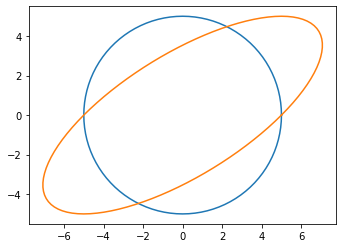

In [5]:
import numpy as np
import matplotlib.pyplot as plt


trans = np.array([[1,1],
                  [0,1]]).reshape(2,2)
pointsx = []
pointsy = []
points = []
r = 5
n = 100
for i in range(n+1):
    point = np.array([0.0, 0.0])
    point[0] = r*np.cos(2*np.pi*float(i)/float(n))
    point[1] = r*np.sin(2*np.pi*float(i)/float(n))
#     print(r*np.cos(2*np.pi*float(i)/float(n)), r*np.sin(2*np.pi*float(i)/float(n)))
#     print(point)
    point.reshape(2,1)
    points.append(point)

points = np.array(points).T
transPoints = trans@points

plt.axes().set_aspect('equal')
plt.plot(points[0,:], points[1,:])
plt.plot(transPoints[0,:], transPoints[1,:])
plt.show()